In [1]:
## load data and packages
setwd("/data/victorxun/scTenifoldTime/inst/GSE137524_HNSCC_cells/")
library(scTenifoldTime)
library(ggplot2)
res <- readRDS("results/networks/res_pcnet1.rds")
gene_name <- rownames(res$beta_mat)

In [2]:
## Define function
gene_list1 <- c("MKI67", "CDK1", "MYL6", "TXN", "CDC27", "CDK4", "HLA-C", "CALM1", "OAZ1", "JUN", "RELB",
                "DLG1", "ICAM1", "BAG3", "XRCC1", "ITGA3", "ADAM10", "ILF3", "CDK16", "GABPB1")
gene_list2 <- c("MYBL2", "LCN2", "RANBP1", "IGFBP3", "TAGLN", "BUB1B", "HSPB1", "CAV1", "COTL1", "AREG", 
                "PHLDA1", "HMGB3", "RRM2", "EREG", "MYC", "HBEGF", "MT1F", "TUBB", "E2F1", "CAV2", "GADD45A",
                "DDX21", "AMD1", "VEGFA", "NINJ1", "PHLDA2", "IGBP1", "ESPL1", "CDK4", "SQSTM1", "TGFB2", "BTG1",
                "KRT16", "PBXIP1", "PKMYT1", "HNRNPAB", "ZFP36L2", "MGLL", "TIMP3", "LIF", "PLAU", "ID3", "CYCS",
                "CTSH", "MT1X", "ABI2", "MCM3", "ARID5B", "SLC20A1", "GRN", "VCL", "PDCD5", "ZFP36L1", "REPIN1",
                "ITGA3", "GABRE", "CDK5", "MET", "CCND1", "SDC4", "ANXA1", "ITGB5", "DUSP6", "ITGA2", "PDE7A")
plot_fun <- function(data_tsne) {
  data_df <- data.frame(TSNE1 = data_tsne[, 1], TSNE2 = data_tsne[, 2], key = 0)
  rownames(data_df) <- gene_name
  data_df[gene_list1, ]$key <- 1
  data_df[gene_list2, ]$key <- 2
  data_df$key <- as.factor(data_df$key)
  
  p <- ggplot(data_df, aes(x = TSNE1, y = TSNE2, color = key, size = key)) +
    geom_point() +
    scale_color_manual(values = c("black", "red", "orange")) +
    scale_size_manual(values = c(0.25, 2, 2)) +
    theme_bw()
  return(p)
}

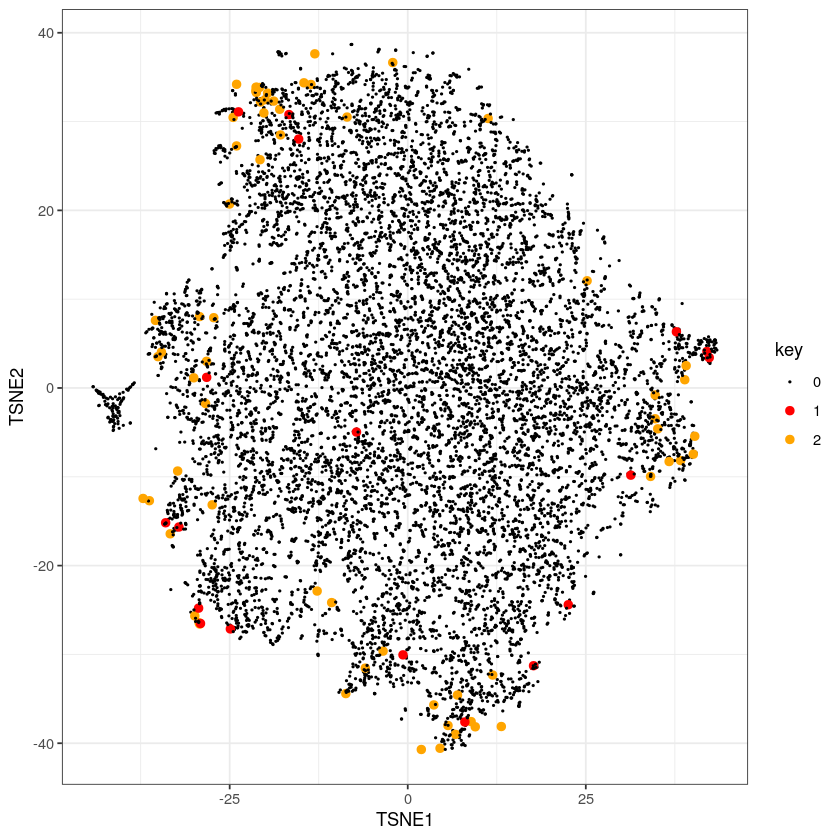

In [3]:
## original plot
TSNE <- res$gene_list$TSNE
print(plot_fun(TSNE))

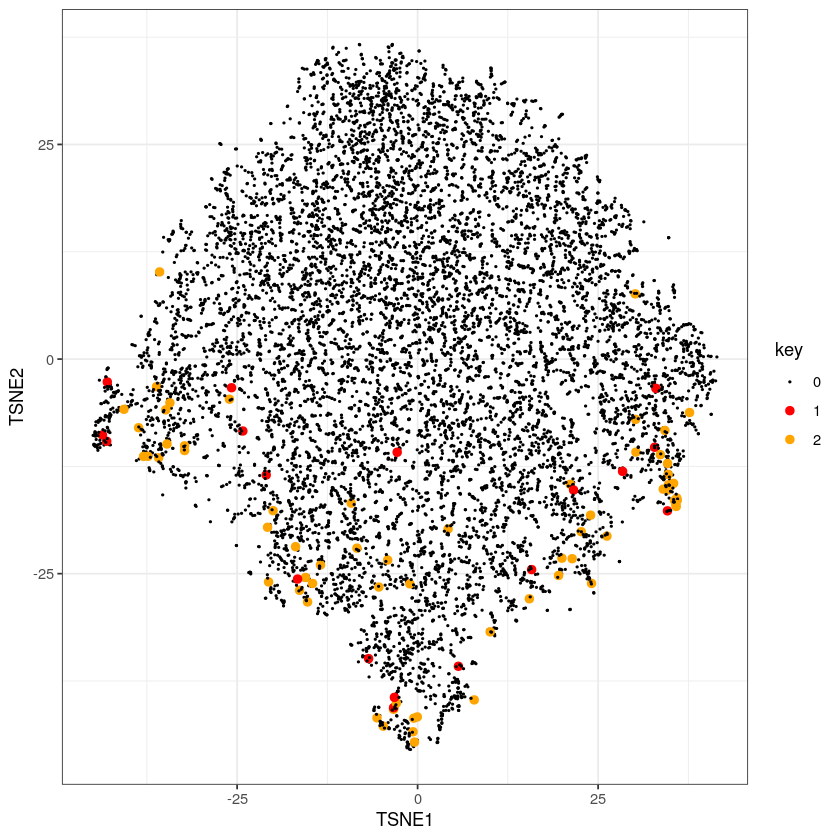

In [3]:
## abs beta matrix
beta_abs <- abs(res$beta_mat)
beta_mat_svd <- RSpectra::svds(beta_abs, k = 50)
beta_mat_pcscore <-  t(t(beta_mat_svd$u) * beta_mat_svd$d)
TSNE <- Rtsne::Rtsne(beta_mat_pcscore, pca = FALSE, check_duplicates = TRUE)$Y
print(plot_fun(TSNE))

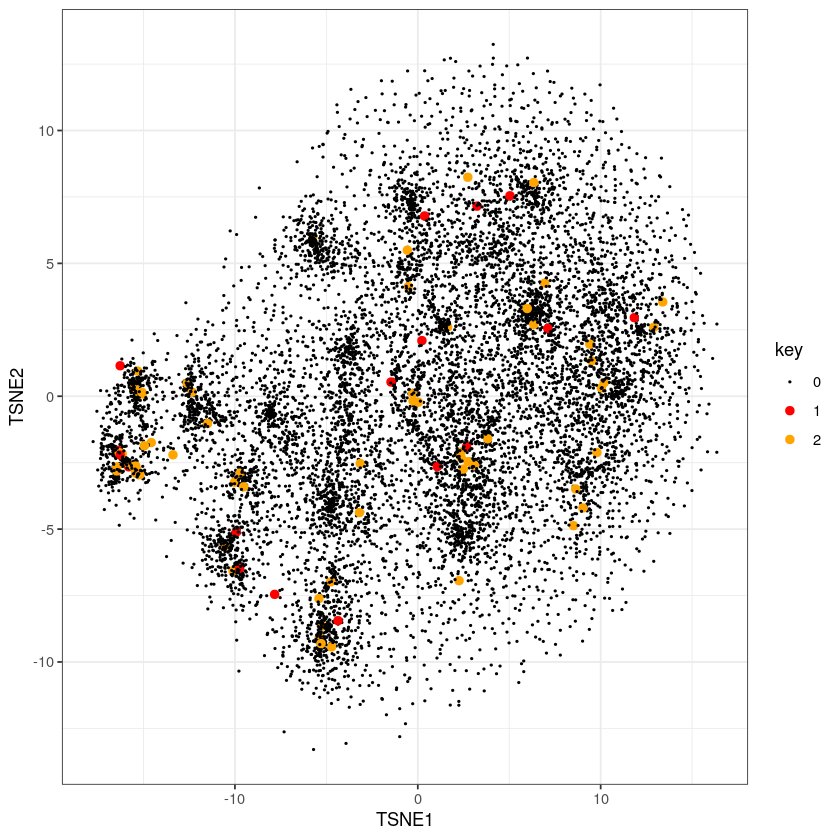

In [4]:
## new test
beta_abs <- abs(res$beta_mat)
distance_mat <- exp(-beta_abs/mean(beta_abs))
diag(distance_mat) <- 0
TSNE <- Rtsne::Rtsne(X = distance_mat, is_distance = TRUE)
print(plot_fun(TSNE$Y))

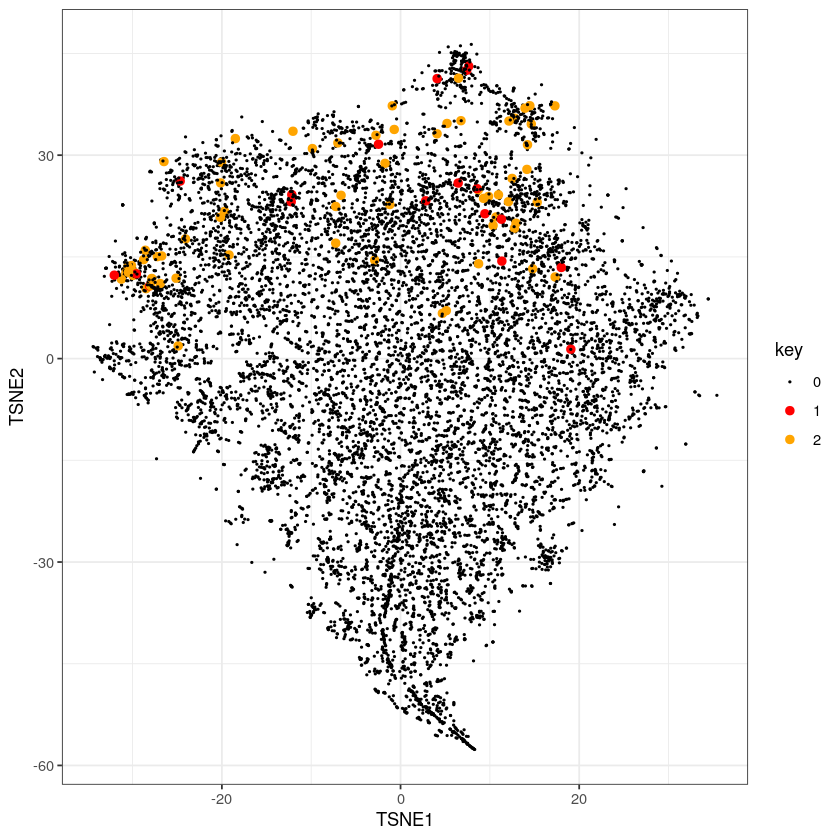

In [5]:
## Laplace test 1
beta_mat <- abs(res$beta_mat)
beta_mat <- (beta_mat + t(beta_mat)) / 2
beta_mat <- -beta_mat
diag(beta_mat) <- 0
diag(beta_mat) <- -apply(beta_mat, 2, sum)
beta_eig <- RSpectra::eigs_sym(beta_mat, k = 51, which = "SM", tol = 1e-5, maxitr = 2000)

beta_eig$values <- as.numeric(beta_eig$values)
beta_eig$vectors <- apply(beta_eig$vectors,2,as.numeric)
newOrder <- order(beta_eig$values)
beta_eig$values <- beta_eig$values[newOrder]
beta_eig$vectors <- beta_eig$vectors[,newOrder]
beta_eig$vectors <- beta_eig$vectors[,beta_eig$values > 1e-5]
## Do TSNE
TSNE <- Rtsne::Rtsne(beta_eig$vectors, pca = FALSE, check_duplicates = TRUE)$Y
print(plot_fun(TSNE))

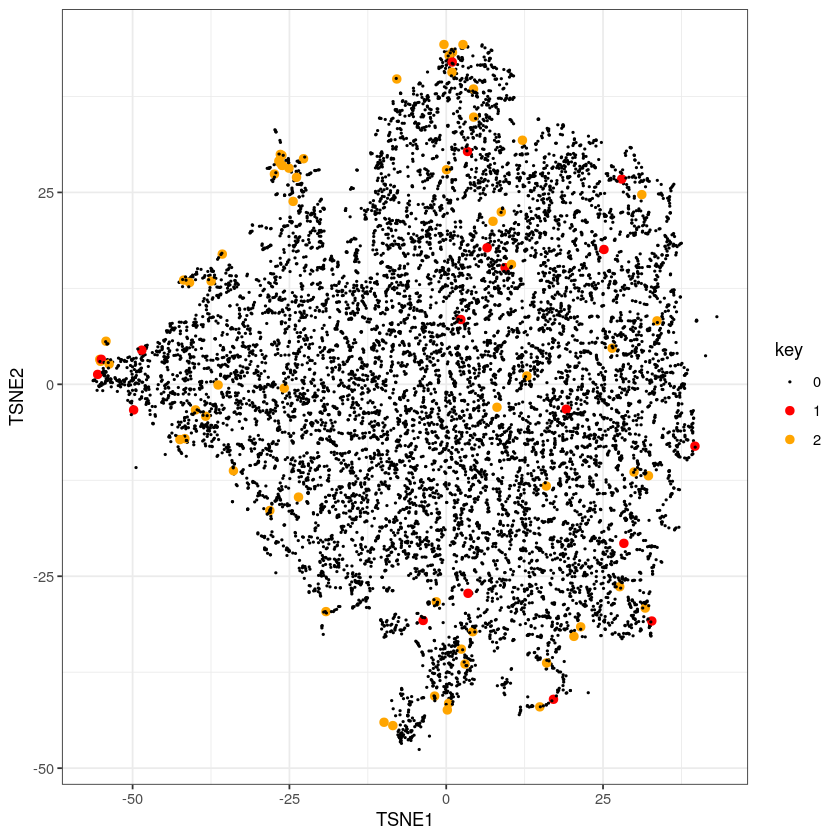

In [6]:
## Laplace test 2
beta_mat <- res$beta_mat - min(res$beta_mat)
beta_mat <- (beta_mat + t(beta_mat)) / 2
beta_mat <- -beta_mat
diag(beta_mat) <- 0
diag(beta_mat) <- -apply(beta_mat, 2, sum)
beta_eig <- RSpectra::eigs_sym(beta_mat, k = 51, which = "SM", tol = 1e-5, maxitr = 2000)

beta_eig$values <- as.numeric(beta_eig$values)
beta_eig$vectors <- apply(beta_eig$vectors,2,as.numeric)
newOrder <- order(beta_eig$values)
beta_eig$values <- beta_eig$values[newOrder]
beta_eig$vectors <- beta_eig$vectors[,newOrder]
beta_eig$vectors <- beta_eig$vectors[,beta_eig$values > 1e-5]
# Do TSNE
TSNE <- Rtsne::Rtsne(beta_eig$vectors, pca = FALSE, check_duplicates = TRUE)$Y
print(plot_fun(TSNE))

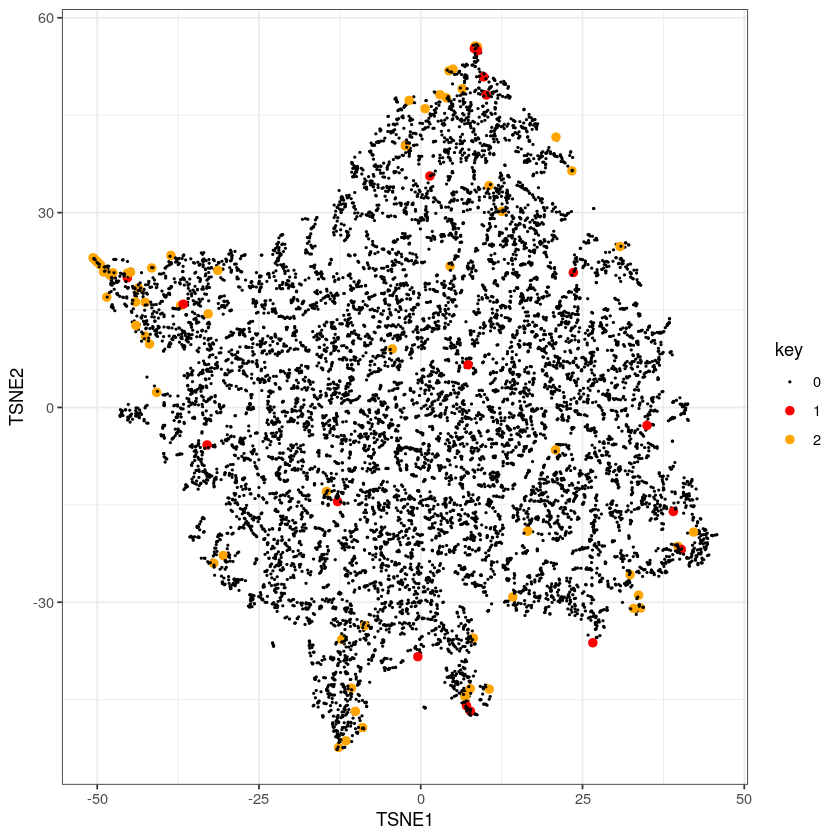

In [7]:
## original plot tensor
TSNE <- res$gene_list_tensor$TSNE
print(plot_fun(TSNE))

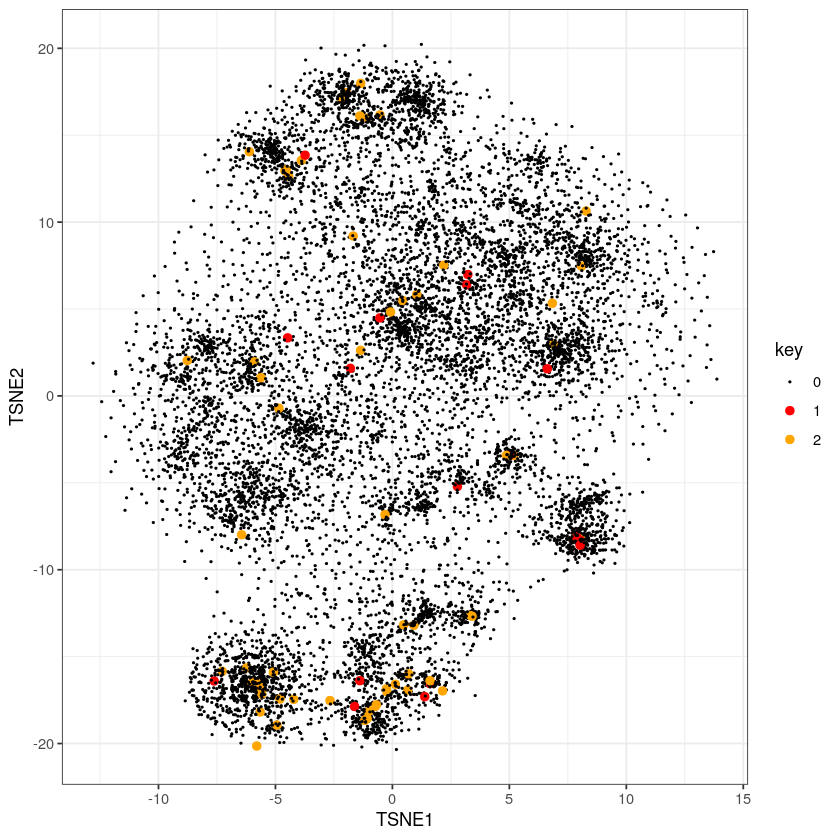

In [8]:
## new test tensor
beta_abs <- abs(res$beta_mat_tensor)
distance_mat <- exp(-beta_abs/mean(beta_abs))
diag(distance_mat) <- 0
TSNE <- Rtsne::Rtsne(X = distance_mat, is_distance = TRUE)
print(plot_fun(TSNE$Y))

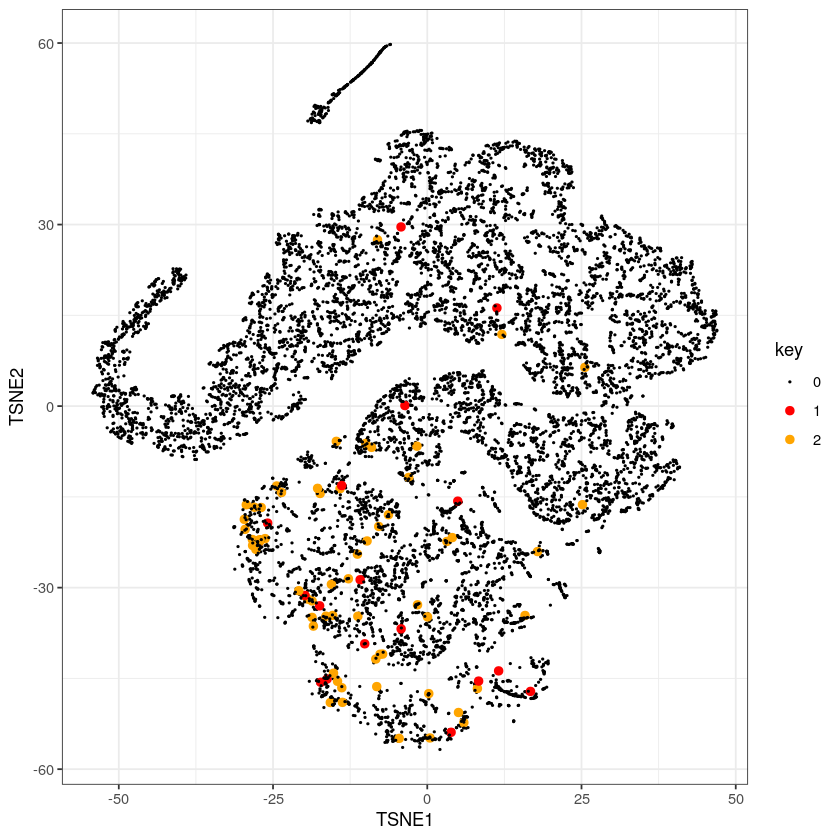

In [9]:
## Laplace test 1 tensor
beta_mat <- abs(res$beta_mat_tensor)
beta_mat <- (beta_mat + t(beta_mat)) / 2
beta_mat <- -beta_mat
diag(beta_mat) <- 0
diag(beta_mat) <- -apply(beta_mat, 2, sum)
beta_eig <- RSpectra::eigs_sym(beta_mat, k = 51, which = "SM", tol = 1e-5, maxitr = 2000)

beta_eig$values <- as.numeric(beta_eig$values)
beta_eig$vectors <- apply(beta_eig$vectors,2,as.numeric)
newOrder <- order(beta_eig$values)
beta_eig$values <- beta_eig$values[newOrder]
beta_eig$vectors <- beta_eig$vectors[,newOrder]
beta_eig$vectors <- beta_eig$vectors[,beta_eig$values > 1e-5]
## Do TSNE
TSNE <- Rtsne::Rtsne(beta_eig$vectors, pca = FALSE, check_duplicates = TRUE)$Y
print(plot_fun(TSNE))

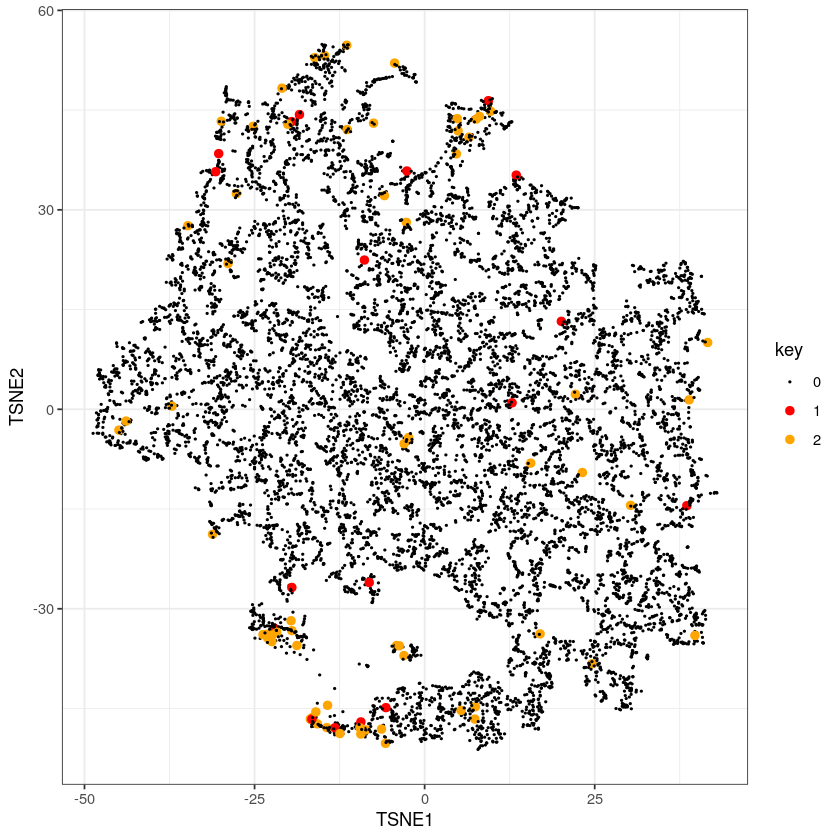

In [10]:
## Laplace test 2
beta_mat <- res$beta_mat_tensor - min(res$beta_mat_tensor)
beta_mat <- (beta_mat + t(beta_mat)) / 2
beta_mat <- -beta_mat
diag(beta_mat) <- 0
diag(beta_mat) <- -apply(beta_mat, 2, sum)
beta_eig <- RSpectra::eigs_sym(beta_mat, k = 51, which = "SM", tol = 1e-5, maxitr = 2000)

beta_eig$values <- as.numeric(beta_eig$values)
beta_eig$vectors <- apply(beta_eig$vectors,2,as.numeric)
newOrder <- order(beta_eig$values)
beta_eig$values <- beta_eig$values[newOrder]
beta_eig$vectors <- beta_eig$vectors[,newOrder]
beta_eig$vectors <- beta_eig$vectors[,beta_eig$values > 1e-5]
# Do TSNE
TSNE <- Rtsne::Rtsne(beta_eig$vectors, pca = FALSE, check_duplicates = TRUE)$Y
print(plot_fun(TSNE))